# Logistic Regression

### Import the Dataset

In [1]:
import pandas as pd
df = pd.read_csv("2017 DC LAR.csv",sep="|")

c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,8,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Prepare the dataset for modeling

In [2]:
# clean the dataset
logData = df.copy(deep=True)

colsToKeep = [
    #"Respondent ID",
    "Loan To Income Ratio",
    "Agency Code",
    "Loan Type",
    "Property Type",
    "Loan Purpose",
    "Occupancy",
    #"Loan Amount (000s)",
    #"Preapproval", #sparsely populated
    "Action Type",
    #"Applicant Ethnicity",  #sparsely populated
    #"Co Applicant Ethnicity",  #sparsely populated
    "Applicant Race 1",
    "Co Applicant Race 1",
    "Applicant Sex",
    "Co Applicant Sex",
    #"Applicant Income (000s)",
    #"Purchaser Type",  #appears to indicate whether or not the application was denied
    #"Rate Spread",  #sparsely populated
    "HOEPA Status",
    "Lien Status",
    "Population",
    "Minority Population %",
    "FFIEC Median Family Income",
    "Tract to MSA/MD Income %",
    "Number of Owner-occupied units",
    "Number of 1-to 4-Family units",
    "Small Institution"
]

logData = logData[colsToKeep]

logData = logData.dropna()

### Logistic Model for Denials

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


# build feature and label arrays
labels = np.array(logData["Action Type"])

features = logData.loc[:, logData.columns != "Action Type"]
features = pd.get_dummies(features)
feature_labels = list(features.columns)
features = np.array(features)


# train test split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 0)


# Declare the standard scaler
std_scaler = StandardScaler()
train_features = std_scaler.fit_transform(train_features)
test_features = std_scaler.transform(test_features)


# model
class_weight_param = "balanced"
lr = LogisticRegression(class_weight=class_weight_param)
lr.fit(train_features, train_labels)


# Test the model
predicted_labels = lr.predict(test_features)
predicted_probabilities = lr.predict_proba(test_features)


# Calculate the precision, recall, and fscore
precision_recall_fscore_support(test_labels, predicted_labels, average='micro')


# view results
results = pd.crosstab(test_labels, predicted_labels, rownames=["Actual"],colnames=["Predicted"])
print(results)


# present accuracy measures
print()
print("Overall Accuracy:","{:.0%}".format(accuracy_score(test_labels, predicted_labels)))
print("Denials Accuracy:","{:.0%}".format(results.loc["Denied","Denied"]/results.loc["Denied"].sum()))

c:\users\spdys\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Predicted  Approved  Denied
Actual                     
Approved       2433     926
Denied          186     628

Overall Accuracy: 73%
Denials Accuracy: 77%


In [4]:
results

Predicted,Approved,Denied
Actual,,
Approved,2433,926
Denied,186,628


In [5]:
results_df = pd.DataFrame(data=test_features)
results_df.columns = feature_labels

results_df["Actual Action"] = test_labels
results_df["Predicted Action"] = predicted_labels
results_df["Predicted Prob of Approval"] = predicted_probabilities[:,0]
results_df["Predicted Prob of Denial"] = predicted_probabilities[:,1]
results_df["Predicted Prob Difference"] = abs(results_df["Predicted Prob of Approval"] - results_df["Predicted Prob of Denial"])

results_df[["Actual Action","Predicted Action","Predicted Prob of Approval","Predicted Prob of Denial","Predicted Prob Difference"]].sort_values(by=["Predicted Prob Difference"],ascending=False).head(20)

results_df[results_df["Predicted Action"] != results_df["Actual Action"]].sort_values(by=["Predicted Prob Difference"],ascending=False).head(20)

,Loan To Income Ratio,Population,Minority Population %,FFIEC Median Family Income,Tract to MSA/MD Income %,Number of Owner-occupied units,Number of 1-to 4-Family units,Small Institution,Agency Code_Consumer Financial Protection Bureau (CFPB),Agency Code_Department of Housing and Urban Development (HUD),...,HOEPA Status_Not a HOEPA loan,Lien Status_Not applicable (purchased loans),Lien Status_Not secured by a lien,Lien Status_Secured by a first lien,Lien Status_Secured by a subordinate lien,Actual Action,Predicted Action,Predicted Prob of Approval,Predicted Prob of Denial,Predicted Prob Difference
3785,32.340298,-1.273516,-0.867865,0.0,0.697414,-0.762805,-0.703482,-0.197956,-0.864553,-0.823746,...,0.017879,-0.35715,-0.255670,0.497952,-0.157504,Approved,Denied,1.109465e-07,1.000000,1.000000
1029,22.777964,-0.867852,1.053721,0.0,-0.585623,0.389936,0.542208,-0.197956,-0.864553,1.213967,...,0.017879,-0.35715,-0.255670,0.497952,-0.157504,Approved,Denied,1.576923e-06,0.999998,0.999997
450,0.028003,-0.512115,1.231863,0.0,-0.881199,-0.867168,-0.506230,-0.197956,-0.864553,1.213967,...,0.017879,-0.35715,-0.255670,0.497952,-0.157504,Denied,Approved,9.980526e-01,0.001947,0.996105
1490,-0.177217,0.553013,0.399843,0.0,-0.995490,-1.016597,-1.222341,-0.197956,1.156667,-0.823746,...,0.017879,-0.35715,3.911288,-2.008226,-0.157504,Approved,Denied,3.524976e-02,0.964750,0.929500
2669,-0.178735,-0.343609,1.242220,0.0,-1.332392,-1.664125,-1.447466,-0.197956,1.156667,-0.823746,...,0.017879,-0.35715,3.911288,-2.008226,-0.157504,Approved,Denied,5.966115e-02,0.940339,0.880678
2206,-0.167759,-1.039826,1.241184,0.0,-1.420694,-1.732910,-0.821405,-0.197956,1.156667,-0.823746,...,0.017879,-0.35715,3.911288,-2.008226,-0.157504,Approved,Denied,5.993191e-02,0.940068,0.880136
3908,-0.174764,-1.263808,0.959471,0.0,-1.311245,-1.517067,-0.823549,-0.197956,1.156667,-0.823746,...,0.017879,-0.35715,3.911288,-2.008226,-0.157504,Approved,Denied,6.209215e-02,0.937908,0.875816
684,-0.168717,0.062055,1.027828,0.0,-0.893306,-1.101986,-1.194469,-0.197956,1.156667,-0.823746,...,0.017879,-0.35715,3.911288,-2.008226,-0.157504,Approved,Denied,6.422261e-02,0.935777,0.871555
2007,3.073760,0.622357,0.773389,0.0,-0.212883,1.303116,1.494164,-0.197956,-0.864553,1.213967,...,0.017879,-0.35715,-0.255670,0.497952,-0.157504,Approved,Denied,6.452335e-02,0.935477,0.870953
923,-0.176901,-0.001741,1.035768,0.0,-0.826636,0.038896,0.409277,-0.197956,1.156667,-0.823746,...,0.017879,-0.35715,3.911288,-2.008226,-0.157504,Approved,Denied,6.717731e-02,0.932823,0.865645


In [6]:
results_df.iloc[1490]

Loan To Income Ratio                                                        -0.177217
Population                                                                   0.553013
Minority Population %                                                        0.399843
FFIEC Median Family Income                                                          0
Tract to MSA/MD Income %                                                     -0.99549
Number of Owner-occupied units                                                -1.0166
Number of 1-to 4-Family units                                                -1.22234
Small Institution                                                           -0.197956
Agency Code_Consumer Financial Protection Bureau (CFPB)                       1.15667
Agency Code_Department of Housing and Urban Development (HUD)               -0.823746
Agency Code_Federal Deposit Insurance Corporation (FDIC)                    -0.200556
Agency Code_Federal Reserve System (FRS)              

In [7]:
#what are characteristics of records with the highest probability of denial?
coefficients = pd.DataFrame(np.exp(lr.coef_))
coefficients.columns = feature_labels
coefficients.T.sort_values(by=[0],ascending=False)

,0
Lien Status_Secured by a first lien,2.111928
Lien Status_Not secured by a lien,1.980851
Loan To Income Ratio,1.718018
Lien Status_Secured by a subordinate lien,1.448096
Loan Purpose_Refinancing,1.308184
Agency Code_Consumer Financial Protection Bureau (CFPB),1.238898
Applicant Race 1_Black or African American,1.221188
Loan Purpose_Home improvement,1.188488
Occupancy_Not owner-occupied,1.076439
HOEPA Status_Not a HOEPA loan,1.070377


## Analysis

#### Initial Model
- My initial logistic regression model showed an 80% accuracy classifying whether a loan would be approved or denied.  However, this was a worthless model.
- This model classified every application as "Approved".
- This is the result of the bias caused by having an imbalance in the distribution of approvals and denials.
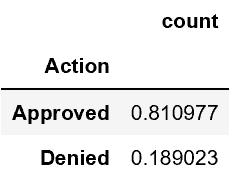

#### Hyperparameters
- The solution is to introduce a mechanism that encourages the model to give a higher predicted probability to the rare class.
- Adjusting class weights, penalizes the model for misclassifying the minority class. From: https://www.linkedin.com/pulse/welcome-real-world-data-imbalance-ian-clark
- The class_weight parameter is set to "balanced".

#### Results
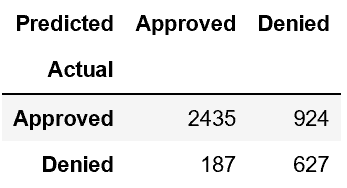

#### Accuracy Measures
- Overall Accuracy: 73%
- Denials Accuracy: 77%

#### Feature Weights
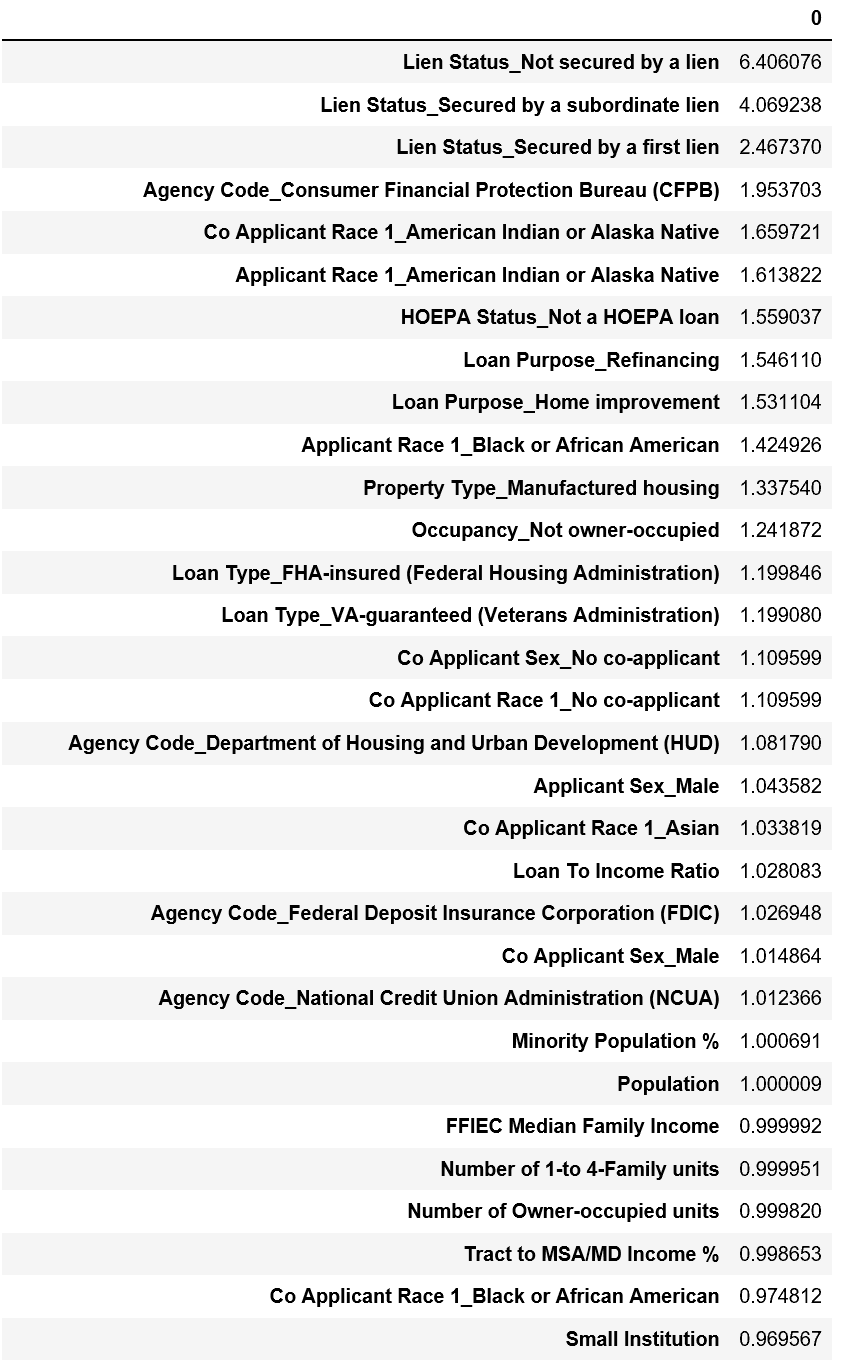

### Distribution of Training Labels

In [8]:
pd.crosstab(train_labels,columns="count",rownames=["Action"],colnames=[""]).apply(lambda r: r/r.sum(), axis=0)

,count
Action,
Approved,0.810977
Denied,0.189023
